<a href="https://colab.research.google.com/github/Ayden0nnn/Programming-Language/blob/main/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
!pip install jieba wordcloud matplotlib

In [70]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

import pandas as pd
# read data and put it in a dataframe
# 在 google 工作表載入 gsheets
gsheets = gc.open_by_url('https://docs.google.com/spreadsheets/d/1XNPiir86gPj3Pe25A9lqa_mBouAFPoQQ402zc1iID5Q/edit#gid=0')

# 從 gsheets 的工作表1、工作表2、工作表3載入 sheets1、sheets2、sheets3
sheets1 = gsheets.worksheet('工作表1').get_all_values()
# 將 sheets1,sheets2,sheets3, 資料載入 pd 的 DataFrame 進行分析
df1 = pd.DataFrame(sheets1[1:], columns=sheets1[0])

In [71]:
text = df1.columns[0]
text

'「愛哭的孩子不要哭，他會咬你的小耳朵。不睡的孩子趕快睡，他會咬你的小指頭～」\r\n相信大多數的人都能琅琅上口這首歌，源自台灣經典的民間故事「虎姑婆」。故事開展於母親有事外出，交代在家的兩個孩子不可隨意開陌生人的門，而衍伸出的寓言故事。\r\n故事中，兩個孩子（通常是姊妹）因一時不察，誤信了作惡的虎妖所佯裝成的姑婆，開門後，虎姑婆要孩子們趕快入睡，但過了不久，姊妹其中一人就聽見虎姑婆卡滋卡滋吃東西的聲音。開口詢問之下，得來吃「花生米」的回答，姊姊便要求一同吃，但虎姑婆不耐地要她趕緊入睡，丟了一顆「花生」搪塞，赫然發現是妹妹的「手指截」，才了解到受騙，且妹妹已遭遇不測，因此趕緊想尿遁脫身。\r\n知道伎倆被識破的虎姑婆，在姊姊反覆要求下，將她用繩子捆住，掐著一端讓她去廁所，不料姊姊逃脫，爬上樹上躲了起來。虎姑婆吆喝，姊姊談起條件，說既然遲早都要被吃，不如自己跳進油鍋，要求虎姑婆把油鍋升到樹上，虎姑婆照做後，姊姊就將熱油從樹上澆下，虎姑婆最後被燙死，死於姊姊的急智。\r\n這個故事原型，流傳的時間久遠且地域甚廣，最早可上至7-9世紀敦煌古藏文寫卷《白噶白喜和金波聶基》與《金波聶基兄弟倆和增巴辛姊妹三人》，清康熙年間黃成增輯錄《廣虞初新志》歙縣傳說〈虎嫗傳〉內紀錄大略的故事情節。1931年，中國民俗學者鍾敬文在1931年將此類故事歸納為「老虎母親（或外婆）」型37；民俗學者丁乃通將之確立為故事編纂索引為333C「老虎外婆」類型。\r\n「老虎外婆」在中國、台灣、日本、朝鮮，甚至是西方（像是小紅帽遇見佯裝成生病外婆的大野狼）都有類似的民間故事，情節各有些微的不同發展。在台灣所採集的版本中，結局也有得救的姊妹其一人被路過的男性相救，嫁給恩人，或是因妹妹被殺害過於悲傷欲自殺，使仙人同情送至月亮成為月娘的變形，被視為集體文化的慈悲心──寓言終成happy ending。\r\n然而，為何故事中的老虎妖，是以「女性」的形象現身呢？一般認為符合舊時代的性別分工，說故事者大多是家中的女性長輩，因此為了使孩童能貼近故事，並將含意牢記在心，因而虎妖以女性的身分登場，容易卸下孩童心防，也符合常識邏輯。\r\n但接著，台灣的虎姑婆是以「姑婆」的親屬關係出現，則是另一個令人玩味的問題，因為根據民間故事學者在中國地區所採集的「老虎外婆」故事版本，皆為「外婆」較多，獨獨在台灣，各地流傳的版本清一色

In [74]:
import re
import string

cleaned_text = re.sub(r'[。|：|「|（|）|，|\n|」|\r《|》|～|；|、|〈|〉|]+'.format(re.escape(string.punctuation)), '', text)
cleaned_text = cleaned_text.replace("的", "")

In [75]:
cleaned_text

'愛哭孩子不要哭他會咬你小耳朵不睡孩子趕快睡他會咬你小指頭相信大多數人都能琅琅上口這首歌源自台灣經典民間故事虎姑婆故事開展於母親有事外出交代在家兩個孩子不可隨意開陌生人門而衍伸出寓言故事故事中兩個孩子通常是姊妹因一時不察誤信了作惡虎妖所佯裝成姑婆開門後虎姑婆要孩子們趕快入睡但過了不久姊妹其中一人就聽見虎姑婆卡滋卡滋吃東西聲音開口詢問之下得來吃花生米回答姊姊便要求一同吃但虎姑婆不耐地要她趕緊入睡丟了一顆花生搪塞赫然發現是妹妹手指截才了解到受騙且妹妹已遭遇不測因此趕緊想尿遁脫身知道伎倆被識破虎姑婆在姊姊反覆要求下將她用繩子捆住掐著一端讓她去廁所不料姊姊逃脫爬上樹上躲了起來虎姑婆吆喝姊姊談起條件說既然遲早都要被吃不如自己跳進油鍋要求虎姑婆把油鍋升到樹上虎姑婆照做後姊姊就將熱油從樹上澆下虎姑婆最後被燙死死於姊姊急智這個故事原型流傳時間久遠且地域甚廣最早可上至7-9世紀敦煌古藏文寫卷白噶白喜和金波聶基與金波聶基兄弟倆和增巴辛姊妹三人清康熙年間黃成增輯錄廣虞初新志歙縣傳說虎嫗傳內紀錄大略故事情節1931年中國民俗學者鍾敬文在1931年將此類故事歸納為老虎母親或外婆型37民俗學者丁乃通將之確立為故事編纂索引為333C老虎外婆類型老虎外婆在中國台灣日本朝鮮甚至是西方像是小紅帽遇見佯裝成生病外婆大野狼都有類似民間故事情節各有些微不同發展在台灣所採集版本中結局也有得救姊妹其一人被路過男性相救嫁給恩人或是因妹妹被殺害過於悲傷欲自殺使仙人同情送至月亮成為月娘變形被視為集體文化慈悲心──寓言終成happy ending然而為何故事中老虎妖是以女性形象現身呢？一般認為符合舊時代性別分工說故事者大多是家中女性長輩因此為了使孩童能貼近故事並將含意牢記在心因而虎妖以女性身分登場容易卸下孩童心防也符合常識邏輯但接著台灣虎姑婆是以姑婆親屬關係出現則是另一個令人玩味問題因為根據民間故事學者在中國地區所採集老虎外婆故事版本皆為外婆較多獨獨在台灣各地流傳版本清一色全是姑婆可以見得姑婆在台灣文化特殊性有研究認為台灣文化中姑婆──外婆姊妹通常會是較遠房親戚平時不易親近符合故事脈絡中孩子在夜半無法一眼認出而受騙另外台灣文化中對小姑姑婆這個已嫁出去女性親屬有著常回娘家說三道四指長道短形象因此主述者將之借喻令人仇惡虎妖也是符合常理亦有論者認為台灣指老處女為姑婆是傳統社會嫌惡女性處境也將之姑婆姑孤形象用在虎姑婆身上'

In [76]:
import jieba
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [77]:
seg_list = jieba.cut(cleaned_text, cut_all=False)
words = list(seg_list)

In [78]:
words

['愛哭',
 '孩子',
 '不要',
 '哭',
 '他',
 '會',
 '咬',
 '你',
 '小耳朵',
 '不',
 '睡',
 '孩子',
 '趕快',
 '睡',
 '他',
 '會',
 '咬',
 '你',
 '小指',
 '頭',
 '相信',
 '大多',
 '數人',
 '都',
 '能',
 '琅琅上口',
 '這',
 '首歌',
 '源自',
 '台灣經',
 '典民間',
 '故事',
 '虎姑婆',
 '故事',
 '開展',
 '於',
 '母親',
 '有事',
 '外出',
 '交代',
 '在家',
 '兩個',
 '孩子',
 '不可',
 '隨意開',
 '陌生人',
 '門而衍',
 '伸出',
 '寓言故事',
 '故事',
 '中',
 '兩個',
 '孩子',
 '通常',
 '是',
 '姊妹',
 '因一時',
 '不察誤',
 '信',
 '了',
 '作惡',
 '虎',
 '妖',
 '所',
 '佯',
 '裝成',
 '姑婆',
 '開門',
 '後',
 '虎姑婆',
 '要',
 '孩子',
 '們',
 '趕快',
 '入睡',
 '但過',
 '了',
 '不久',
 '姊妹',
 '其中',
 '一人',
 '就',
 '聽',
 '見',
 '虎姑婆',
 '卡滋卡滋吃',
 '東西',
 '聲音',
 '開口',
 '詢問',
 '之下',
 '得來',
 '吃',
 '花生米',
 '回答',
 '姊姊',
 '便',
 '要求',
 '一同',
 '吃',
 '但',
 '虎姑婆',
 '不耐地',
 '要',
 '她',
 '趕緊',
 '入睡',
 '丟了',
 '一顆',
 '花生',
 '搪塞',
 '赫然',
 '發現',
 '是',
 '妹妹',
 '手指',
 '截才',
 '了解',
 '到',
 '受',
 '騙且',
 '妹妹',
 '已',
 '遭遇',
 '不測',
 '因此',
 '趕緊',
 '想',
 '尿',
 '遁',
 '脫身',
 '知道',
 '伎倆',
 '被識',
 '破',
 '虎姑婆',
 '在',
 '姊姊',
 '反覆',
 '要求',
 '下將',
 '她',
 '用',
 '繩子',
 '捆住',
 '掐',
 '著',


In [86]:
word_freq = Counter(words)
print(word_freq)

Counter({'故事': 12, '虎姑婆': 11, '是': 10, '在': 10, '姑婆': 8, '台灣': 8, '外婆': 7, '孩子': 6, '姊姊': 6, '中': 5, '姊妹': 5, '被': 5, '老虎': 5, '女性': 5, '了': 4, '妖': 4, '為': 4, '也': 4, '有': 4, '文化': 4, '─': 4, '符合': 4, '會': 3, '都': 3, '於': 3, '虎': 3, '所': 3, '後': 3, '要': 3, '吃': 3, '要求': 3, '她': 3, '妹妹': 3, '因此': 3, '上': 3, '說': 3, '中國': 3, '學者': 3, '版本': 3, '以': 3, '形象': 3, '認為': 3, '他': 2, '咬': 2, '你': 2, '睡': 2, '趕快': 2, '大多': 2, '能': 2, '母親': 2, '兩個': 2, '通常': 2, '佯': 2, '裝成': 2, '入睡': 2, '就': 2, '見': 2, '但': 2, '趕緊': 2, '受': 2, '已': 2, '用': 2, '樹': 2, '這個': 2, '流傳': 2, '至': 2, '和': 2, '金波': 2, '聶基': 2, '故': 2, '事情': 2, '1931': 2, '民俗': 2, '採集': 2, '使': 2, '者': 2, '孩童': 2, '令人': 2, '較': 2, '將之': 2, '愛哭': 1, '不要': 1, '哭': 1, '小耳朵': 1, '不': 1, '小指': 1, '頭': 1, '相信': 1, '數人': 1, '琅琅上口': 1, '這': 1, '首歌': 1, '源自': 1, '台灣經': 1, '典民間': 1, '開展': 1, '有事': 1, '外出': 1, '交代': 1, '在家': 1, '不可': 1, '隨意開': 1, '陌生人': 1, '門而衍': 1, '伸出': 1, '寓言故事': 1, '因一時': 1, '不察誤': 1, '信': 1, '作惡': 1, '開門': 1, '們': 1, '但過': 1, '不

In [87]:
!apt-get -qq install -y fonts-noto-cjk
# !wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

In [88]:
font_path = "/usr/share/fonts/truetype/noto/NotoSansCJK-Regular.ttc"
wc = WordCloud(font_path=font_path, background_color="white", max_words=2000, width=800, height=600)
wordcloud = wc.generate_from_frequencies(word_freq)

(-0.5, 799.5, 599.5, -0.5)

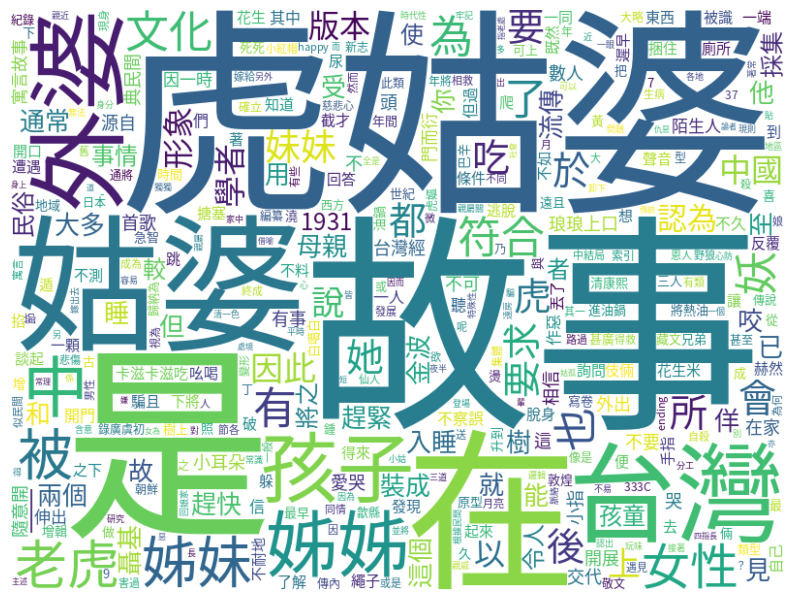

In [89]:
# 显示文字云
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')